In [10]:
from pathlib import Path

import geopandas as gpd
import icechunk
import numpy as np
import pandas as pd
import xarray as xr
import zarr

In [11]:
import boto3
import os

profile_name = "CIROH_USER"  # Replace with your AWS credentials file profile name
os.environ['AWS_PROFILE'] = profile_name

In [12]:
file_path = Path("/projects/mhpi/yxs275/DM_output/HydroFabric_forward_1980_2019_From_dPL_local_daymet_v6_2v18_2_oneGPU_dynamic_k0_1980_1995")
bucket="mhpi-spatial"
prefix="hydrofabric_v2.2_dhbv_retrospective"
commit="initial streamflow commit"

### Reading the icechunk store

In [13]:
storage_config = icechunk.s3_storage(
bucket=bucket, prefix=prefix, region="us-east-2", anonymous=True
)
repo = icechunk.Repository.open(storage_config)
session = repo.readonly_session("main")
cloud_ds = xr.open_zarr(session.store, consolidated=False)

xr.set_options(display_style="text")
cloud_ds

/home/tbindas/tbindas/.conda/envs/nwm_batcher/lib/python3.12/site-packages/zarr/codecs/vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)


<xarray.Dataset> Size: 49GB
Dimensions:    (divide_id: 833543, time: 14610)
Coordinates:
  * time       (time) datetime64[ns] 117kB 1980-01-01 1980-01-02 ... 2019-12-31
  * divide_id  (divide_id) object 7MB 'cat-1068193' ... 'cat-3008411'
Data variables:
    Qr         (divide_id, time) float32 49GB dask.array<chunksize=(188, 1827), meta=np.ndarray>
Attributes:
    description:  Runoff outputs from dhbv2.0 at the HFv2.2 catchment scale

In [14]:
gdf = gpd.read_file("/projects/mhpi/data/hydrofabric/v2.2/conus_nextgen.gpkg", layer="divides")
gdf = gdf.set_index("divide_id")

<Axes: >

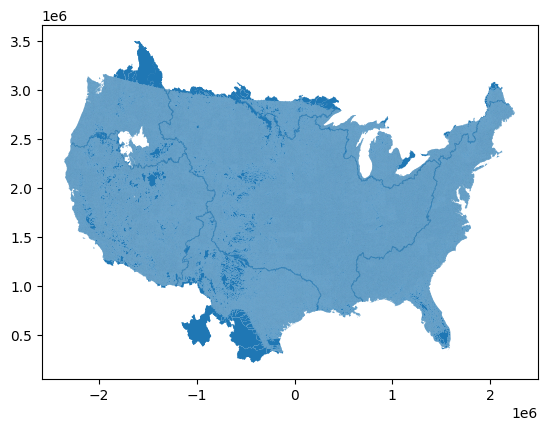

In [16]:
gdf.loc[cloud_ds.divide_id.values].plot()